In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
from tabulate import tabulate
sys.path.append(os.path.abspath('../..'))
from models import LogisticRegression, LogisticRegressionUndersampling, LogisticRegressionOversampling, LogisticRegressionSmote, LogisticRegressionCostReWeighting
from binary_metrics import ClassificationMetrics
from fine_tuning import find_best_lambda
df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_1/data/raw/breast_cancer_dev.csv')
df_test = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_1/data/raw/breast_cancer_test.csv')

In [2]:
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

## **Regresion without balancing. Finding best lambda for L2 regularization.**

Outer Iteration: 100%|██████████| 10/10 [00:03<00:00,  3.32iteration/s]


RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤════════════╕
│   Lambda │    F-Score │
╞══════════╪════════════╡
│   0      │ 0.631841   │
├──────────┼────────────┤
│   0.0001 │ 0.617884   │
├──────────┼────────────┤
│   0.001  │ 0.626463   │
├──────────┼────────────┤
│   0.01   │ 0.637454   │
├──────────┼────────────┤
│   0.1    │ 0.639383   │
├──────────┼────────────┤
│   1      │ 0.625964   │
├──────────┼────────────┤
│  10      │ 0.353536   │
├──────────┼────────────┤
│ 100      │ 0.00665627 │
╘══════════╧════════════╛
El mejor lambda es 0.1 con un f-score promedio de 0.6394


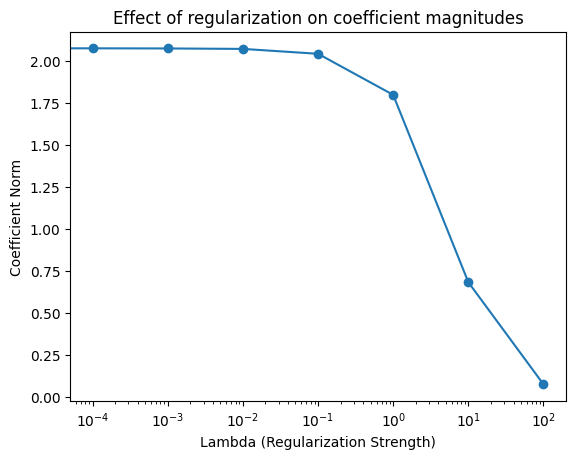

In [3]:
best_lambda_without_balancing = find_best_lambda(df, LogisticRegression, 0.245)

## **Logistic Regression with undersampling technique. Finding best lambda for L2 regularization.**

Outer Iteration: 100%|██████████| 10/10 [00:02<00:00,  3.79iteration/s]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.771205 │
├──────────┼───────────┤
│   0.0001 │  0.767013 │
├──────────┼───────────┤
│   0.001  │  0.763822 │
├──────────┼───────────┤
│   0.01   │  0.760281 │
├──────────┼───────────┤
│   0.1    │  0.763282 │
├──────────┼───────────┤
│   1      │  0.760146 │
├──────────┼───────────┤
│  10      │  0.523668 │
├──────────┼───────────┤
│ 100      │  0.375968 │
╘══════════╧═══════════╛
El mejor lambda es 0 con un f-score promedio de 0.7712


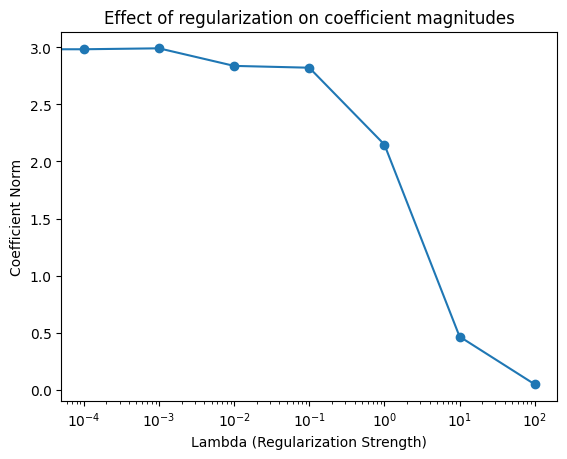

In [4]:
best_lambda_undersampling = find_best_lambda(df, LogisticRegressionUndersampling, 0.5, rebalancing_method=lambda model: model.undersampling())

## **Logistic Regression with oversampling technique. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [00:07<00:00,  1.30iteration/s]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.778244 │
├──────────┼───────────┤
│   0.0001 │  0.797589 │
├──────────┼───────────┤
│   0.001  │  0.773348 │
├──────────┼───────────┤
│   0.01   │  0.783973 │
├──────────┼───────────┤
│   0.1    │  0.774756 │
├──────────┼───────────┤
│   1      │  0.781001 │
├──────────┼───────────┤
│  10      │  0.777784 │
├──────────┼───────────┤
│ 100      │  0.557461 │
╘══════════╧═══════════╛
El mejor lambda es 0.0001 con un f-score promedio de 0.7976


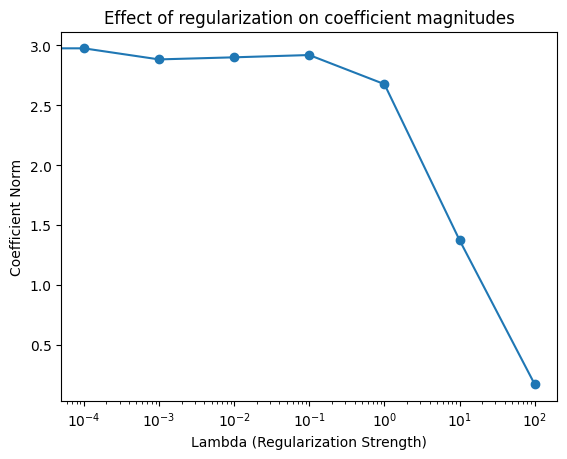

In [5]:
best_lambda_oversampling = find_best_lambda(df, LogisticRegressionOversampling, 0.5, rebalancing_method=lambda model: model.oversampling())

## **Logistic Regression with smote rebalancing technique. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [01:13<00:00,  7.38s/iteration]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.795419 │
├──────────┼───────────┤
│   0.0001 │  0.798679 │
├──────────┼───────────┤
│   0.001  │  0.796755 │
├──────────┼───────────┤
│   0.01   │  0.796593 │
├──────────┼───────────┤
│   0.1    │  0.799059 │
├──────────┼───────────┤
│   1      │  0.7921   │
├──────────┼───────────┤
│  10      │  0.777191 │
├──────────┼───────────┤
│ 100      │  0.574909 │
╘══════════╧═══════════╛
El mejor lambda es 0.1 con un f-score promedio de 0.7991


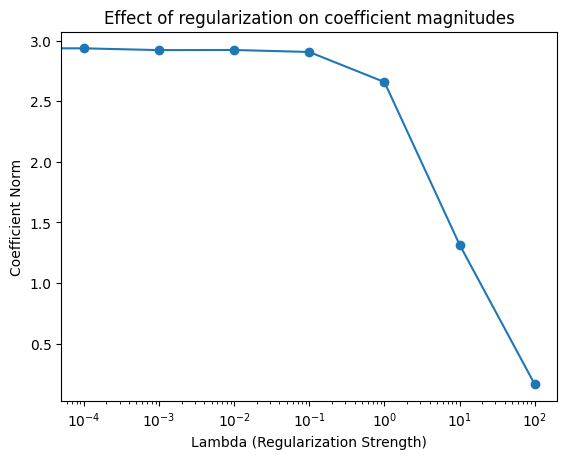

In [6]:
best_lambda_smote = find_best_lambda(df, LogisticRegressionSmote, 0.5, rebalancing_method=lambda model: model.smote())

## **Logistic Regression with cost reweighting. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [00:03<00:00,  2.59iteration/s]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.609665 │
├──────────┼───────────┤
│   0.0001 │  0.62284  │
├──────────┼───────────┤
│   0.001  │  0.624496 │
├──────────┼───────────┤
│   0.01   │  0.637005 │
├──────────┼───────────┤
│   0.1    │  0.621355 │
├──────────┼───────────┤
│   1      │  0.608044 │
├──────────┼───────────┤
│  10      │  0.3401   │
├──────────┼───────────┤
│ 100      │  0.01     │
╘══════════╧═══════════╛
El mejor lambda es 0.01 con un f-score promedio de 0.6370


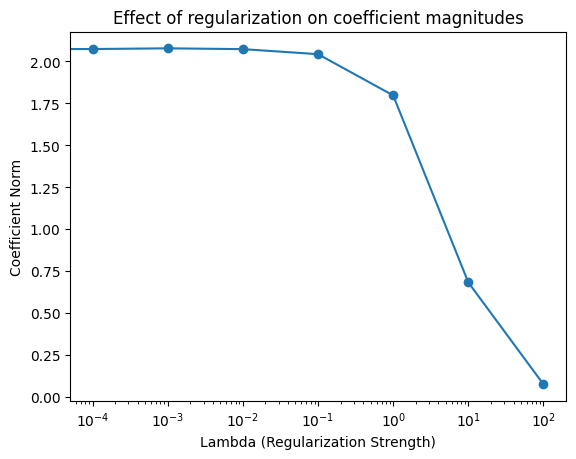

In [7]:
best_lambda_reweighting = find_best_lambda(df, LogisticRegressionCostReWeighting, 0.245)

## **Model training on full dev ser using the finded best lambda hiperparameter. Metric analysis on test set for the trained models.**

LogReg WithoutRebalancing


                 Predicted Negative  Predicted Positive
Actual Negative                  51                   4
Actual Positive                   6                   8
LogReg WithUndersampling
                 Predicted Negative  Predicted Positive
Actual Negative                  45                  10
Actual Positive                   6                   8
LogReg WithOversampling
                 Predicted Negative  Predicted Positive
Actual Negative                  45                  10
Actual Positive                   6                   8
LogReg WithSmote
                 Predicted Negative  Predicted Positive
Actual Negative                  46                   9
Actual Positive                   6                   8
LogReg WithCostReWeighting
                 Predicted Negative  Predicted Positive
Actual Negative                  55                   0
Actual Positive                  14                   0
╒════════════════════════════╤════════════╤═════════════╤══════════

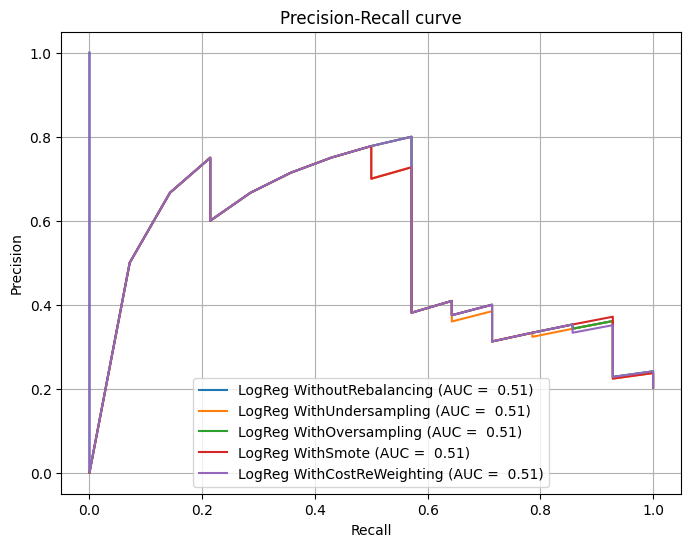

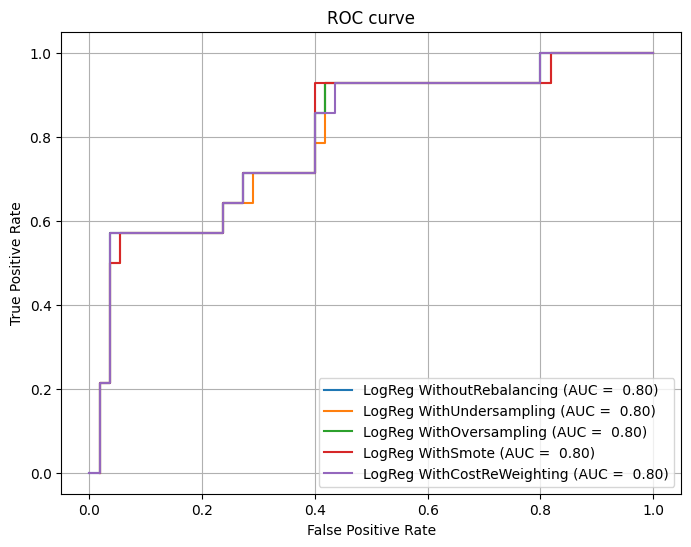

In [8]:
reg_without_balancing_best_lambda = LogisticRegression(
    df, threshold=0.245, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_without_balancing
)
reg_with_undersampling_best_lambda = LogisticRegressionUndersampling(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_undersampling
)
reg_with_oversampling_best_lambda = LogisticRegressionOversampling(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_oversampling
)
reg_with_smote_best_lambda = LogisticRegressionSmote(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_smote
)
reg_with_cost_re_weighting_best_lambda = LogisticRegressionCostReWeighting(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_reweighting
)

models = [reg_without_balancing_best_lambda, reg_with_undersampling_best_lambda,
          reg_with_oversampling_best_lambda, reg_with_smote_best_lambda,
          reg_with_cost_re_weighting_best_lambda]

model_names = ['LogReg WithoutRebalancing', 'LogReg WithUndersampling',
               'LogReg WithOversampling', 'LogReg WithSmote',
               'LogReg WithCostReWeighting']

precision_values_list = []
recall_values_list = []
auc_pr_values_list = []

false_positive_rate_values_list = []
true_positive_rate_values_list = []
auc_roc_value_list = []

metrics_for_each_model = {model_name : {'Accuracy': 0, 'Precision' : 0, 'Recall' : 0, 'F-Score' : 0, 'PR value' : 0, 'ROC value' : 0} for model_name in model_names}

original_df = df

for model, name in zip(models, model_names):
    df = original_df.copy()
    if name == 'LogReg WithUndersampling':
        df = model.undersampling()

    elif name == 'LogReg WithOversampling':
        df = model.oversampling()

    elif name == 'LogReg WithSmote':
        df = model.smote()

    else:
        df = df

    X_train_full, y_train_full = df.drop(columns=['target']), df['target']
    model.fit(X_train_full, y_train_full)
    predicted_probs = model.predict_proba(X_test)
    predicted_targets = model.predict(X_test)

    metrics = ClassificationMetrics(y_test,
                                    predicted_targets,
                                    predicted_probs)

    confusion_matrix = metrics.confusion_matrix()
    accuracy = metrics.accuracy()
    precision = metrics.precision()
    recall = metrics.recall()
    f_score = metrics.f_score()
    recall_values, precision_values, auc_pr_value = metrics.auc_pr()
    recall_values_list.append(recall_values)
    precision_values_list.append(precision_values)
    auc_pr_values_list.append(auc_pr_value)
    tpr_values, fpr_values, auc_roc_value = metrics.auc_roc()
    true_positive_rate_values_list.append(tpr_values)
    false_positive_rate_values_list.append(fpr_values)
    auc_roc_value_list.append(auc_roc_value)

    metrics_for_each_model[name] = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F-Score' : f_score,
        'PR value' : auc_pr_value,
        'ROC value' : auc_roc_value
    }

    print(f'{name}\n')
    print(confusion_matrix)

metrics_df = pd.DataFrame.from_dict(metrics_for_each_model, orient='index')
metrics_df = metrics_df.round(4)
table = tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=True)
print(table)

metrics.plot_pr_curve(recall_values_list, precision_values_list, auc_pr_values_list, model_names)
metrics.plot_roc_curve(false_positive_rate_values_list, true_positive_rate_values_list, auc_roc_value_list, model_names)